In [208]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [368]:
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [369]:
stock = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2025ML+DL Programming/dataset/TSLA.csv")

In [370]:
stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [371]:
stock.drop(['Adj Close'], axis=1, inplace=True)
stock.drop(['Date'], axis=1, inplace=True)
stock.drop(['Volume'], axis=1, inplace=True)

In [372]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(stock)

In [373]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [374]:
X = []
y = []
window_size = 10
# 4일치 데이터로 다음날 Close 예측하기
for i in range(len(scaled_data) - window_size):
    X.append(scaled_data[i:i+window_size, :4])  # Open, High, Low → 3개 feature
    y.append(scaled_data[i+window_size, 3])    # 다음 날 Close만 라벨


In [375]:
X = np.array(X)
y = np.array(y)

# 훈련/테스트 분리 (70% 훈련)
train_size = int(len(X) * 0.7)
train_X, test_X = X[:train_size], X[train_size:]
train_y, test_y = y[:train_size], y[train_size:]

In [379]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow as tf

In [378]:
# LSTM 모델 구성
LSTMmodel = Sequential()
LSTMmodel.add(LSTM(64, return_sequences=True, input_shape=(window_size, 4)))
LSTMmodel.add(Dropout(0.2))
LSTMmodel.add(LSTM(32))
LSTMmodel.add(Dropout(0.2))
LSTMmodel.add(Dense(1))

LSTMmodel.compile(optimizer='adam', loss='mse')
LSTMmodel.summary()

Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_54 (LSTM)                  │ (None, 10, 64)         │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_84 (Dropout)            │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_55 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_85 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,113 (117.63 KB)

 Trainable params: 30,113 (117.63 KB)

 Non-trainable params: 0 (0.00 B)

In [377]:
#RNN 모델 구성
RNNmodel = Sequential()
RNNmodel.add(SimpleRNN(64, return_sequences=True, input_shape=(window_size, 4)))
RNNmodel.add(Dropout(0.2))
RNNmodel.add(SimpleRNN(32))
RNNmodel.add(Dropout(0.2))
RNNmodel.add(Dense(1))

RNNmodel.compile(optimizer='adam', loss='mse')
RNNmodel.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_44 (SimpleRNN)       │ (None, 10, 64)         │         4,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_82 (Dropout)            │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_45 (SimpleRNN)       │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_83 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,553 (29.50 KB)

 Trainable params: 7,553 (29.50 KB)

 Non-trainable params: 0 (0.00 B)

In [380]:
LSTMmodel.fit(train_X, train_y, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 7.3299e-05
Epoch 2/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.2392e-05
Epoch 3/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 1.1346e-05
Epoch 4/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 9.8565e-06
Epoch 5/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 9.5164e-06
Epoch 6/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 8.8964e-06
Epoch 7/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 7.7631e-06
Epoch 8/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 8.1338e-06
Epoch 9/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 9.5636e-06
Epoch 10/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 8.6622e-06
Epoch 11/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 7.4576e-06
Epoch 12/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 7.3339e-06
Epoch 13/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 8.2416e-06
Epoch 14/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 7.5130e-

In [381]:
RNNmodel.fit(train_X, train_y, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0056
Epoch 2/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.4476e-04
Epoch 3/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2732e-04
Epoch 4/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.4173e-05
Epoch 5/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.7179e-05
Epoch 6/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 5.6333e-05
Epoch 7/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.2985e-05
Epoch 8/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3.4457e-05
Epoch 9/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.0547e-05
Epoch 10/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.7135e-05
Epoch 11/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.6093e-05
Epoch 12/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1598e-05
Epoch 13/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.9564e-05
Epoch 14/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.9880e-05
Epoch

In [382]:
# 예측
pred_scaled_RNN = RNNmodel.predict(test_X)
# 예측 복원
temp = np.zeros((len(pred_scaled_RNN), 4))
temp[:, 3] = pred_scaled_RNN[:, 0]
pred_close_RNN = scaler.inverse_transform(temp)[:, 3]

# 실제값 복원
temp2 = np.zeros((len(test_y), 4))
temp2[:, 3] = test_y
real_close_RNN = scaler.inverse_transform(temp2)[:, 3]

print("예측값 예시:", pred_close_RNN[:5])
print("실제값 예시:", real_close_RNN[:5])


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
예측값 예시: [59.18978122 59.43399745 60.1867907  59.84869753 60.29597714]
실제값 예시: [59.666    59.82     59.936001 60.198002 61.916   ]


In [383]:
# 예측
pred_scaled_LSTM = LSTMmodel.predict(test_X)

# 스케일 복원: 예측값
temp_pred = np.zeros((len(pred_scaled_LSTM), 4))
temp_pred[:, 3] = pred_scaled_LSTM[:, 0]
pred_close_LSTM = scaler.inverse_transform(temp_pred)[:, 3]

# 스케일 복원: 실제값
temp_real = np.zeros((len(test_y), 4))
temp_real[:, 3] = test_y
real_close_LSTM = scaler.inverse_transform(temp_real)[:, 3]

print("예측값 예시:", pred_close_LSTM[:5])
print("실제값 예시:", real_close_LSTM[:5])


28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
예측값 예시: [58.64429688 59.4565504  59.90803898 60.13365074 60.381884  ]
실제값 예시: [59.666    59.82     59.936001 60.198002 61.916   ]


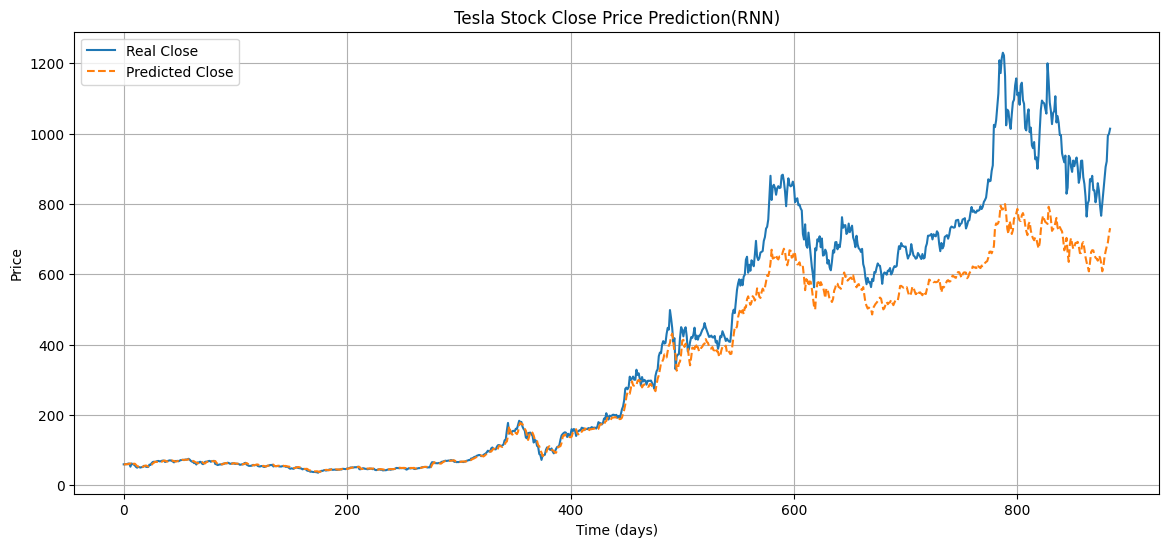

In [384]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(real_close_RNN, label="Real Close")
plt.plot(pred_close_RNN, label="Predicted Close", linestyle='--')
plt.title("Tesla Stock Close Price Prediction(RNN)")
plt.xlabel("Time (days)")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


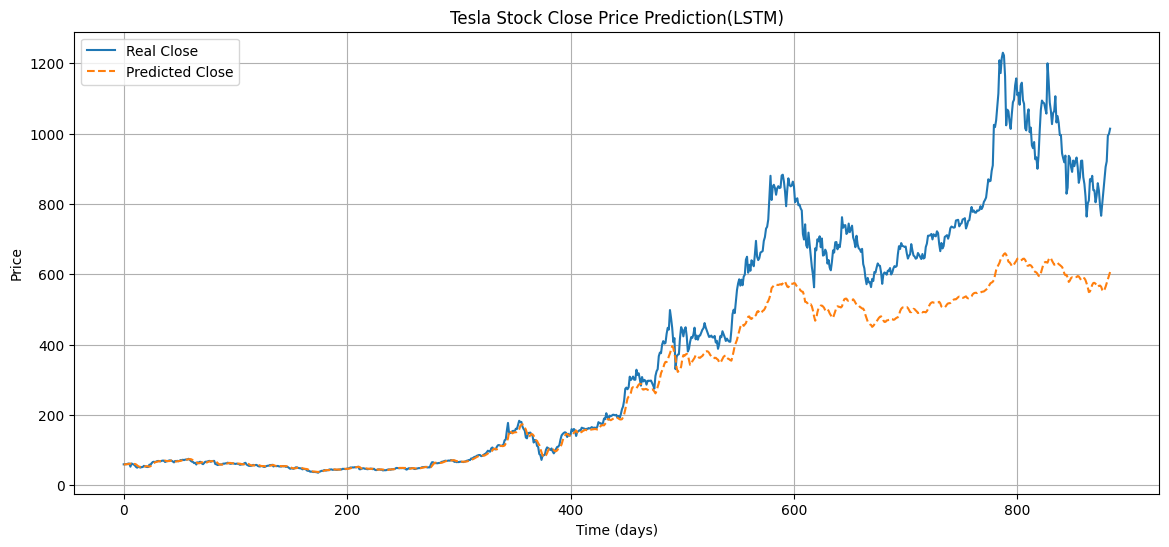

In [385]:
plt.figure(figsize=(14, 6))
plt.plot(real_close_LSTM, label="Real Close")
plt.plot(pred_close_LSTM, label="Predicted Close", linestyle='--')
plt.title("Tesla Stock Close Price Prediction(LSTM)")
plt.xlabel("Time (days)")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

In [386]:
from sklearn.metrics import mean_squared_error
import numpy as np

# MSE
mse = mean_squared_error(real_close_RNN, pred_close_RNN)

# RMSE (루트 MSE)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.6f}")
print(f"RMSE: {rmse:.6f}")

MSE: 14838.663564
RMSE: 121.814053
